# Supervised Machine Learning
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
# Define path

path=r'/Users/sofiakazeko/Jupiter/Achievement 6 - University Rankings'

In [5]:
# Import data

df_cwur = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'cwurData.csv'), index_col = False)

In [6]:
df_cwur.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


### 2. Data cleaning

In [7]:
df_cwur.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [9]:
df_cwur.shape

(2200, 14)

In [10]:
#Finding Missing Values
df_cwur.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

Since "Broad Impact" in CWUR is based on the h-index (which measures research influence), the best way to handle missing values is to keep it as is for transparency. If the "Broad Impact" column is empty for certain universities, it may be due to insufficient data to calculate a meaningful h-index, possibly resulting from a lower volume of published research or fewer citations. Leaving it as NaN accurately reflects that it does not have a measurable broad impact. If needed for analysis "Missing Impact" column can be created to track universities without h-index data. Moreover after additional observation I've noticed that the data for 2012 and 2013 contains only 100 universities per year and is missing broad_impact data. While for years 2014-2015 it's 1000 universities per year with broad_impact data included.

In [12]:
#check for mixed types
for col in df_cwur.columns.tolist():
  weird = (df_cwur[[col]].map(type) != df_cwur[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_cwur[weird]) > 0:
    print (col)

In [13]:
#finding duplicates
df_dups1 = df_cwur[df_cwur.duplicated()]

In [14]:
df_dups1

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year


In [15]:
df_cwur.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

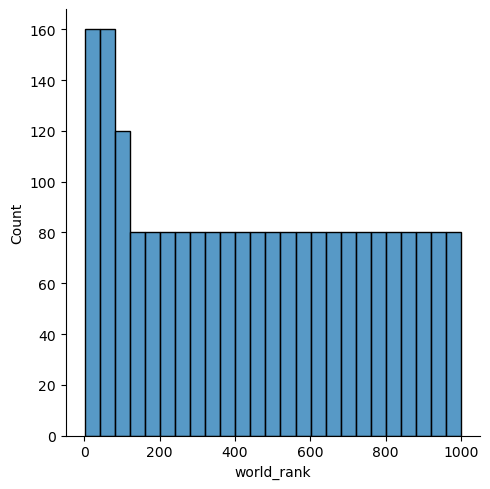

In [20]:
sns.displot(df_cwur['world_rank'], bins=25) # Shows extreme values
plt.show()

In [24]:
df_cwur['world_rank'].mean() # Check the mean

459.59090909090907

In [25]:
df_cwur['world_rank'].median() # Check the median

450.5

In [26]:
df_cwur['world_rank'].max() # Check the max

1000

In [27]:
df_cwur['world_rank'].min() # Check the min

1

all the values look reasonable

## Hypothesis 1:
### If a university has more publications, then it will have a better rank (smaller). Where the rank is the dependant variable and publications - independant variable and can be a significant predictor.

### 3. Data prep for regression analysis 

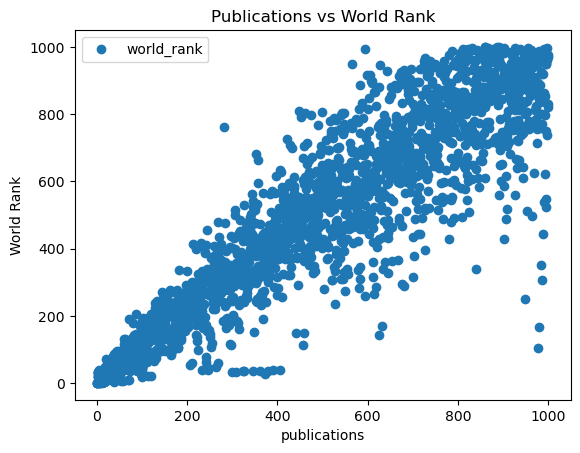

In [31]:
# Create a scatterplot

df_cwur.plot(x = 'publications', y='world_rank',style='o')
plt.title('Publications vs World Rank')  
plt.xlabel('publications')  
plt.ylabel('World Rank')  
plt.show()

In [33]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_cwur['publications'].values.reshape(-1,1)
y = df_cwur['world_rank'].values.reshape(-1,1)

In [34]:
X

array([[  1],
       [ 12],
       [  4],
       ...,
       [830],
       [886],
       [861]])

In [35]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]])

In [36]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [38]:
# Create a regression object.

regression = LinearRegression()

In [39]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

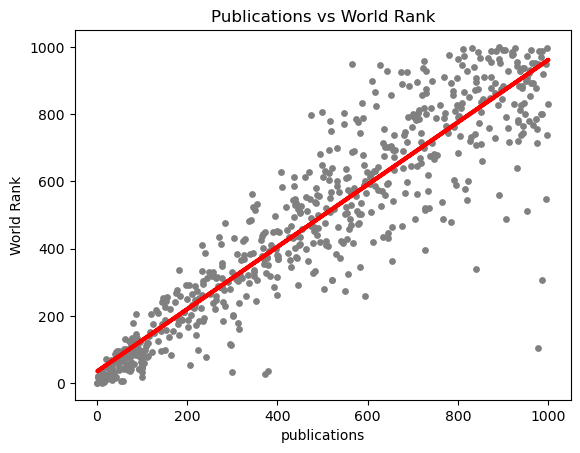

In [41]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Publications vs World Rank')
plot_test.xlabel('publications')
plot_test.ylabel('World Rank')
plot_test.show()


The regression line reasonably fits the data, capturing the general upward trend between the number of publications and world rank. Most points cluster near the line, indicating a positive correlation; however, there are noticeable deviations, particularly at higher publications counts, suggesting variability not fully captured by the model. While the line reflects the overall trend, further analysis, such as calculating the R-squared value, is needed to assess the model's accuracy. It should be noted that according to the hypothesis a negative correlation was expected but according to the analysis there is a positive one.

In [42]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [43]:
# Print the model summary statistics.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92663174]]
Mean squared error:  13689.228500084244
R2 score:  0.8517912567513867


In [44]:
y_predicted

array([[139.59567827],
       [222.0659032 ],
       [147.93536393],
       [ 77.51135163],
       [557.50659337],
       [ 54.34555811],
       [330.48181688],
       [313.80244554],
       [236.89201105],
       [853.10211869],
       [574.18596471],
       [837.3493791 ],
       [726.1535702 ],
       [633.49039612],
       [923.526131  ],
       [516.73479678],
       [949.47181974],
       [611.25123434],
       [747.46610024],
       [868.85485829],
       [733.56662413],
       [522.29458722],
       [293.41654724],
       [599.20502171],
       [685.38177361],
       [892.94728355],
       [589.01207256],
       [397.19930221],
       [202.60663664],
       [104.38367212],
       [910.55328663],
       [ 97.89724993],
       [ 95.11735471],
       [297.12307421],
       [701.1345132 ],
       [938.35223885],
       [946.69192452],
       [672.40892924],
       [114.57662127],
       [639.97681831],
       [128.47609738],
       [633.49039612],
       [199.82674142],
       [200

In [45]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,121,139.595678
1,168,222.065903
2,92,147.935364
3,65,77.511352
4,529,557.506593
5,71,54.345558
6,366,330.481817
7,200,313.802446
8,247,236.892011
9,864,853.102119


The comparison of actual and predicted values shows both overestimations and underestimations, with larger errors for higher actual values. For example, when the actual value is 449, the model predicts 397.2, underestimating by 51.8. While the model captures the overall trend, it struggles with extreme values.

## Compare how the regression fits the training set

In [47]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [48]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [49]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.92663174]]
Mean squared error:  13708.74015994238
R2 score:  0.852025731776532


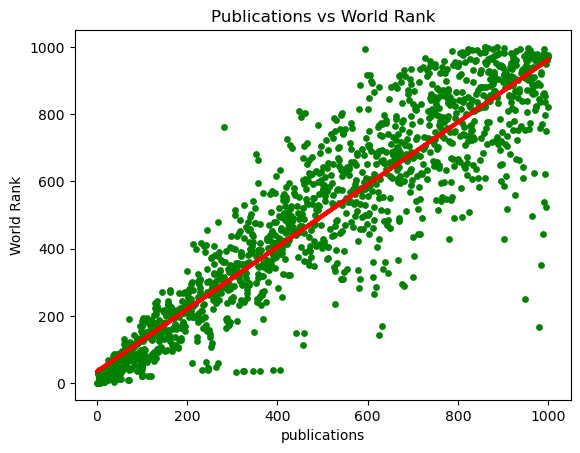

In [50]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Publications vs World Rank')
plot_test.xlabel('publications')
plot_test.ylabel('World Rank')
plot_test.show()


The model effectively captures the relationship between publications and university ranking.The strong R² score (0.85) suggests that publications significantly impact rankings, though other factors may contribute to the remaining 15% variance. The minimal difference between training and test performance implies the model is not overfitting and generalizes well.

### Model Performance on the Test Set
The model performs reasonably well on the test set, capturing the general trend between the number of publications and university world rankings. However, discrepancies increase for higher values, suggesting it struggles with extreme cases that deviate from the training pattern. Fine-tuning or feature engineering could improve prediction accuracy.


### Reflections on Data Bias
Possible data bias could significantly impact the model's performance and its generalizability. For instance, selection bias can exclude smaller universities, while measurement bias can arise from inconsistent publication counts. Selection bias favors highly ranked institutions, and omitted variable bias ignores key factors like reputation and teaching quality. Temporal bias skews results by focusing on a limited time frame, and geographic bias reduces generalizability. Addressing these issues can improve fairness and accuracy.